In [ ]:
import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import torch.autograd as autograd
import torch.optim as optim
# from transformers import BertModel, AdamW, BertTokenizer
# from torchcrf import CRF
from typing import List, Optional
import torch
import torch.nn as nn
# from transformers import BertModel, AdamW, BertTokenizer
from typing import List, Optional
import statistics
import torch
import torch.nn as nn
# from transformers import BertModel, AdamW, BertTokenizer
from typing import List, Optional
import statistics
import time
import numpy as np
import math
import random

In [ ]:
pip uninstall pytorch-crf

Found existing installation: pytorch-crf 0.7.2
Uninstalling pytorch-crf-0.7.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/crf/*
    /usr/local/lib/python3.8/dist-packages/pytorch_crf-0.7.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/torchcrf/*
Proceed (Y/n)? y
  Successfully uninstalled pytorch-crf-0.7.2


In [ ]:
!nvidia-smi

Tue Jan 17 08:00:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
import numpy as np
import math

import os
import logging
import time
import seaborn as sn
sn.set(style='darkgrid')

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import jieba
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim
# from torchcrf import CRF    #This class provides an implementation of a CRF layer.
from torch.utils.data import Dataset,DataLoader, RandomSampler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'   #單個代碼快顯示全部輸出

#%matplotlib auto    #畫圖彈出

In [ ]:
import json

data = []
with open('train.json', encoding="utf-8") as f: #讀取訓練集資料
    for line in f:
        data.append(json.loads(line))

'''
id : a sentence identifier
genre : genres of written textsm including "ft" (formal texts) and "sm" (social media)
sentence : a sentence is represented in terms of character sequence
word : a list of segmented word sequence
word_label : a list of the correpsonding word labels
character : a list of segmented character sequence
character_label : a list of the corresponding character labels
'''
print(data[0]['id'])
print(data[0]['genre'])
print(data[0]['sentence'])
print(data[0]['word'])
print(data[0]['word_label'])
print(data[0]['character'])
print(data[0]['character_label'])
print(len(data))

'\nid : a sentence identifier\ngenre : genres of written textsm including "ft" (formal texts) and "sm" (social media)\nsentence : a sentence is represented in terms of character sequence\nword : a list of segmented word sequence\nword_label : a list of the correpsonding word labels\ncharacter : a list of segmented character sequence\ncharacter_label : a list of the corresponding character labels\n'

00000
ft
且像這類即時心臟超音波診斷，對於瓣膜性病人如二尖瓣和主動脈疾病的人幫助最大，當病人喘不過氣、出現心雜音時，超音波掃瞄一下就能發現是不是瓣膜問題，如果發現瓣膜脫垂嚴重導致血液逆流，趕快通知開刀房和加護病房準備開刀。
['且', '像', '這類', '即時', '心臟超音波', '診斷', '，', '對於', '瓣膜性', '病人', '如', '二尖瓣', '和', '主動脈疾病', '的', '人', '幫助', '最', '大', '，', '當', '病人', '喘不過氣', '、', '出現', '心雜音', '時', '，', '超音波', '掃瞄', '一下', '就', '能', '發現', '是', '不', '是', '瓣膜', '問題', '，', '如果', '發現', '瓣膜', '脫垂', '嚴重', '導致', '血液', '逆流', '，', '趕快', '通知', '開刀房', '和', '加護病房', '準備', '開刀', '。']
['O', 'O', 'O', 'O', 'EXAM', 'O', 'O', 'O', 'O', 'O', 'O', 'BODY', 'O', 'DISE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SYMP', 'O', 'O', 'EXAM', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'BODY', 'O', 'O', 'O', 'O', 'BODY', 'SYMP', 'O', 'O', 'BODY', 'SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'TREAT', 'O']
['且', '像', '這', '類', '即', '時', '心', '臟', '超', '音', '波', '診', '斷', '，', '對', '於', '瓣', '膜', '性', '病', '人', '如', '二', '尖', '瓣', '和', '主', '動', '脈', '疾', '病', '的', '人', '幫', '助', '最', '大', '，', '當', '病', '人', '喘', '不', '過', '氣', '、'

In [ ]:
dataset = pd.DataFrame(data)
dataset

id genre                                           sentence  \
0      00000    ft  且像這類即時心臟超音波診斷，對於瓣膜性病人如二尖瓣和主動脈疾病的人幫助最大，當病人喘不過氣、...   
1      00001    sm  凡是已有性經驗的女性，無論年齡大小都須定期做子宮頸抹片檢查，尤其是太早即有性行為者、多重性伴...   
2      00002    sm                                        如何治療胃食道逆流症？   
3      00003    ft    常熬夜的人一定有經驗，很想來些薯條、披薩、炸雞、可樂、蚵仔麵線、香辣鍋，最後就一定是吃了它們。   
4      00004    ft  紅豆水在２０１４年成為瘦身的養生新選擇，蔚為一股潮流，繼之而起的黑豆水同樣受矚目，主打消水腫...   
...      ...   ...                                                ...   
28156  28156    ft           硝化甘油只能救急冠心病若不治療，但要小心，誤用、濫用可能害了自己，甚至誤人性命。   
28157  28157    ft                   重溝通，除了專業醫療，溝通及服務品質也是建立良好醫病關係的基礎。   
28158  28158    ft                        「反正你已經有一個女兒了，她也很乖很可愛，這樣就夠了。   
28159  28159    ft  如果沒有仔細分辨外寒的假象，貿然給予四物湯、中將湯，反而愈補愈怕冷，月經一樣不來，痘痘又拚命...   
28160  28160    ft                    另外，也可至復健科門診或復健科診所，運用專業的儀器檢查與測試。   

                                                    word  \
0      [且, 像, 這類, 即時, 心臟超音波, 診斷, ，, 對於, 瓣膜性, 病人, 如, 二...   
1      [凡是, 已, 有, 性經驗, 的, 女性, ，, 無論, 年齡, 大小, 都, 須, 定期...   
2                                    [如何, 治療, 胃食道逆流症, ？]   
3      [常, 熬夜, 的, 人, 一定, 有, 經驗, ，, 很, 想, 來, 些, 薯條, 、,...   
4      [紅豆, 水, 在, ２０１４年, 成為, 瘦身, 的, 養生, 新, 選擇, ，, 蔚為,...   
...                                                  ...   
28156  [硝化甘油, 只, 能, 救急, 冠心病, 若, 不, 治療, ，, 但, 要, 小心, ，...   
28157  [重, 溝通, ，, 除了, 專業, 醫療, ，, 溝通, 及, 服務, 品質, 也, 是,...   
28158  [「, 反正, 你, 已經, 有, 一個, 女兒, 了, ，, 她, 也, 很, 乖, 很,...   
28159  [如果, 沒有, 仔細, 分辨, 外寒, 的, 假象, ，, 貿然, 給予, 四物湯, 、,...   
28160  [另外, ，, 也, 可, 至, 復健科門診, 或, 復健科診所, ，, 運用, 專業, 的...   

                                              word_label  \
0      [O, O, O, O, EXAM, O, O, O, O, O, O, BODY, O, ...   
1      [O, O, O, O, O, O, O, O, O, O, O, O, O, O, EXA...   
2                                        [O, O, DISE, O]   
3      [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4      [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
...                                                  ...   
28156  [CHEM, O, O, O, DISE, O, O, O, O, O, O, O, O, ...   
28157  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
28158  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
28159  [O, O, O, O, SYMP, O, O, O, O, O, DRUG, O, DRU...   
28160  [O, O, O, O, O, O, O, O, O, O, O, O, INST, O, ...   

                                               character  \
0      [且, 像, 這, 類, 即, 時, 心, 臟, 超, 音, 波, 診, 斷, ，, 對, ...   
1      [凡, 是, 已, 有, 性, 經, 驗, 的, 女, 性, ，, 無, 論, 年, 齡, ...   
2                      [如, 何, 治, 療, 胃, 食, 道, 逆, 流, 症, ？]   
3      [常, 熬, 夜, 的, 人, 一, 定, 有, 經, 驗, ，, 很, 想, 來, 些, ...   
4      [紅, 豆, 水, 在, ２, ０, １, ４, 年, 成, 為, 瘦, 身, 的, 養, ...   
...                                                  ...   
28156  [硝, 化, 甘, 油, 只, 能, 救, 急, 冠, 心, 病, 若, 不, 治, 療, ...   
28157  [重, 溝, 通, ，, 除, 了, 專, 業, 醫, 療, ，, 溝, 通, 及, 服, ...   
28158  [「, 反, 正, 你, 已, 經, 有, 一, 個, 女, 兒, 了, ，, 她, 也, ...   
28159  [如, 果, 沒, 有, 仔, 細, 分, 辨, 外, 寒, 的, 假, 象, ，, 貿, ...   
28160  [另, 外, ，, 也, 可, 至, 復, 健, 科, 門, 診, 或, 復, 健, 科, ...   

                                         character_label  
0      [O, O, O, O, O, O, B-EXAM, I-EXAM, I-EXAM, I-E...  
1      [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
2      [O, O, O, O, B-DISE, I-DISE, I-DISE, I-DISE, I...  
3      [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
4      [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
...                                                  ...  
28156  [B-CHEM, I-CHEM, I-CHEM, I-CHEM, O, O, O, O, B...  
28157  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
28158  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
28159  [O, O, O, O, O, O, O, O, B-SYMP, I-SYMP, O, O,...  
28160  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  

[28161 rows x 7 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


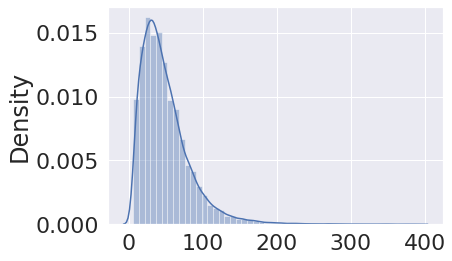

In [ ]:
len_list = []
for index in range(dataset['sentence'].shape[0]):
    len_list.append(len(dataset['sentence'][index]))
#len_list
sn.set(font_scale=2)  #設置字體大小
sn.distplot(len_list) #橫軸句子長度，縱軸該長度的量

['B-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'B-BODY', 'I-BODY', 'I-BODY', 'B-DISE', 'I-DISE', 'I-DISE', 'I-DISE', 'I-DISE', 'B-SYMP', 'I-SYMP', 'I-SYMP', 'B-EXAM', 'I-EXAM', 'I-EXAM', 'B-BODY', 'I-BODY', 'B-BODY', 'I-BODY', 'B-SYMP', 'I-SYMP', 'B-BODY', 'I-BODY', 'B-SYMP', 'I-SYMP', 'B-TREAT', 'I-TREAT', 'B-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'B-BODY', 'I-BODY', 'I-BODY', 'B-SYMP', 'I-SYMP', 'B-DISE', 'I-DISE', 'I-DISE', 'I-DISE', 'I-DISE', 'I-DISE', 'B-SYMP', 'I-SYMP', 'B-CHEM', 'B-BODY', 'I-BODY', 'I-BODY', 'B-BODY', 'I-BODY', 'I-BODY', 'I-BODY', 'I-BODY', 'I-BODY', 'I-BODY', 'B-BODY', 'I-BODY', 'B-BODY', 'I-BODY', 'B-BODY', 'I-BODY', 'I-BODY', 'B-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'I-EXAM', 'B-BODY', 'I-BODY', 'B-CHEM', 'I-CHEM', 'I-CHEM', 'B-BODY', 'I-BODY', 'B-SYMP', 'B-BODY', 'I-BODY', 'B-BODY', 'I-BODY', 'B-SYMP', 'I-SYMP', 'I-SYMP', 'I-SYMP', 'B-BODY', 'I-BODY', 'B-DISE', 'I-DISE', 'B-DISE

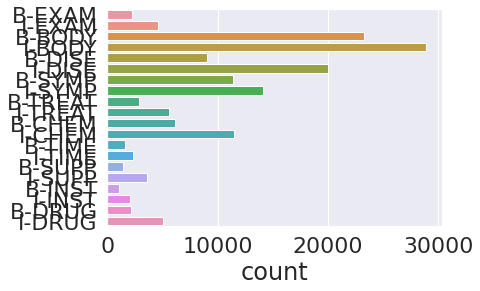

In [ ]:
strings = ''
for s in dataset['character_label']:
  line = ''
  for i in s:
    line = line + str(i) + str(' ')
  strings = strings+line
#創建list，去掉'O'
count_list = []
orig_count_list = strings.split()
for s in orig_count_list:
    if s.startswith('O')==False and s.endswith('O')==False : #這個數據集有很多無效標籤
        count_list.append(s)
print(count_list)
sn.countplot(y=count_list) #橫軸標籤類別，縱軸該簽的量

In [ ]:
MAX_LEN = 250    #句子的長度
BATCH_SIZE = 32   #Batch的大小
EMBEDDING_DIM = 210 #EMBEDDING維度大小
HIDDEN_DIM = 12   #隱藏層維度

In [ ]:
dicPath = "vocab.txt"
# 獲取 tag to index 辭典
def get_tag2index():
    return {"O": 0,
        "B-BODY":1,
        "I-BODY":2,
        "B-SYMP":3,
        "I-SYMP":4,
        "B-INST":5,
        "I-INST":6,
        "B-EXAM":7,
        "I-EXAM":8,
        "B-CHEM":9,
        "I-CHEM":10,
        "B-DISE":11,
        "I-DISE":12,
        "B-DRUG":13,
        "I-DRUG":14,
        "B-SUPP":15,
        "I-SUPP":16,
        "B-TREAT":17,
        "I-TREAT":18,
        "B-TIME":19,
        "I-TIME":20}
# 獲取 word to index 辭典
def get_w2i(vocab_path = dicPath):
    w2i = {}
    with open(vocab_path, encoding = 'utf-8') as f:
        while True:
            text = f.readline()
            if not text:
                break
            text = text.strip()
            if text and len(text) > 0:
                w2i[text] = len(w2i) + 1
    return w2i

def pad2mask(t):
    if t==pad_index:  #轉换成mask所用的0
        return 0
    else:
        return 1

def text_tag_to_index(dataset):
    texts = []
    labels = []
    masks = []
    for row in range(len(dataset)):
        text = dataset.iloc[row]['character']        #text
        tag = dataset.iloc[row]['character_label']        #tag
        if len(text)!=len(tag):  #如果從數據集獲得的text和label長度不一致，就不要了？（那對驗證會不會有影響）
          next
        #1. word轉index
        #1.1 text詞彙
        text_index = []
        text_index.append(start_index)   #先加入開頭ndex
        for word in text:
            text_index.append(w2i.get(word, unk_index))   #將當前詞轉成辭典對應index，或不認識標註UNK的index
        text_index.append(end_index)   #最后加個结尾index
        #index
        #1.2 tag標籤
        # tag = tag.split()
        tag_index = [tag2i.get(t,0) for t in tag]
        tag_index = [0] + tag_index + [0]

        #2. 填充或截至句子至標準長度
        #2.1 text词匯&tag標籤
        if len(text_index)<MAX_LEN:    #句子短，補充pad_index到滿夠MAX_LEN
            pad_len = MAX_LEN-len(text_index)
            text_index = text_index + [pad_index]*pad_len
            tag_index = tag_index + [0]*pad_len
        elif len(text_index)>MAX_LEN:  #句子過長，截斷
            text_index = text_index[:MAX_LEN-1]
            text_index.append(end_index)
            tag_index = tag_index[:MAX_LEN-1]
            tag_index.append(0)
        masks.append([pad2mask(t) for t in text_index])
        texts.append(text_index)
        labels.append(tag_index)
        
    #把list類型的轉為tensor類型，方便後期進行訓練
    texts = torch.LongTensor(texts)
    labels = torch.LongTensor(labels)
    masks = torch.tensor(masks, dtype=torch.uint8)
    return texts,labels,masks

class MiDataset(Dataset):
    def __init__(self, texts, labels, masks):
        self.dataset = texts     #torch.tensor(texts)
        self.labels = labels    #torch.tensor(labels)
        self.masks = masks
        
        self.nums = len(self.dataset)
        
    def __getitem__(self, index):
        data = {'texts': self.dataset[index],
                'labels':self.labels[index],
                'masks':self.masks[index]}
        return data
    
    def __len__(self):
        return self.nums
    
#unk：未知詞  pad：填充   start：文本開頭   end：文本结束
unk_flag = '[UNK]'
pad_flag = '[PAD]'
start_flag = '[STA]'
end_flag = '[END]' 

w2i = get_w2i()   #獲得word_to_index辭典
tag2i = get_tag2index()    #獲得tag_to_index辭典

#w2i 替換成特殊符號
unk_index = w2i.get(unk_flag, 101)    #未知詞
pad_index = w2i.get(pad_flag, 1)    #填充
start_index = w2i.get(start_flag, 102)  #開始
end_index = w2i.get(end_flag, 103)   #中間截至（主要用在有上下句的情況下）

In [ ]:
#將訓練集的字符全部轉成index，並改成MAX_LEN長度
texts,labels,masks = text_tag_to_index(dataset)
texts.shape
labels.shape
masks.shape

#將數據集用MiDataset類包裝
train_data = MiDataset(texts,labels,masks)
train_data

#train_sampler = RandomSampler(train_data)    #將訓練集打亂
train_loader = DataLoader(dataset=train_data,   #按batch_size加載訓練集
                                batch_size=BATCH_SIZE, 
                                #sampler=train_sampler,
                                num_workers=0,
                                shuffle=False,
                                drop_last=False)
train_loader

torch.Size([28161, 250])

torch.Size([28161, 250])

torch.Size([28161, 250])

In [ ]:
#把第一個batch_data拿出来看看
for step, batch_data in enumerate(train_loader):
    print("step:"+str(step))

    batch_data['texts'].shape
    print("texts:"+str(batch_data['texts'][0])+"--------------------")
    # batch_data['texts'][0]
    print("labels:"+str(batch_data['labels'][0])+"--------------------")

    batch_data['labels'].shape
    # batch_data['labels'][0]
    print("masks:"+str(batch_data['masks'][0])+"--------------------")

    batch_data['masks'].shape
    # batch_data['masks'][0]
    print(batch_data['masks'][0].sum())
    if step>=0:
        break

step:0


torch.Size([32, 250])

texts:tensor([ 102,  684, 1008, 6857, 7546, 1315, 3229, 2552, 5627, 6631, 7509, 3797,
        6262, 3174, 8024, 2205, 3176, 4480, 5606, 2595, 4567,  782, 1963,  753,
        2211, 4480, 1469,  712, 1240, 5548, 4565, 4567, 4638,  782, 2396, 1221,
        3297, 1920, 8024, 4534, 4567,  782, 1596,  679, 6882, 3706,  510, 1139,
        4412, 2552, 7429, 7509, 3229, 8024, 6631, 7509, 3797, 2954, 4730,  671,
         678, 2218, 5543, 4634, 4412, 3221,  679, 3221, 4480, 5606, 1558, 7539,
        8024, 1963, 3362, 4634, 4412, 4480, 5606, 5562, 1795, 1713, 7028, 2206,
        5636, 6117, 3890, 6847, 3837, 8024, 6634, 2571, 6858, 4761, 7274, 1143,
        2791, 1469, 1217, 6362, 4567, 2791, 3976,  991, 7274, 1143,  511,  103,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,   

torch.Size([32, 250])

masks:tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)--------------------


torch.Size([32, 250])

tensor(108)


In [ ]:
import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import torch.autograd as autograd
import torch.optim as optim
# from transformers import BertModel, AdamW, BertTokenizer
# from torchcrf import CRF
from typing import List, Optional
import torch
import torch.nn as nn
# from transformers import BertModel, AdamW, BertTokenizer
from typing import List, Optional
import statistics
import torch
import torch.nn as nn
# from transformers import BertModel, AdamW, BertTokenizer
from typing import List, Optional
import statistics
import time
import numpy as np
import math
import random

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class SVM:
    def __init__(self, trainDataList, trainLabelList, sigma = 10, C = 200, toler = 0.001):
        
        self.trainDataMat = np.mat(trainDataList)       #训练数据集
        self.trainLabelMat = np.mat(trainLabelList).T   #训练标签集，为了方便后续运算提前做了转置，变为列向量
        self.m, self.n = np.shape(self.trainDataMat)    #m：训练集数量    n：样本特征数目
        self.sigma = sigma                              #高斯核分母中的σ
        self.C = C                                      #惩罚参数
        self.toler = toler                              #松弛变量
        self.k = self.calcKernel()                      #核函数（初始化时提前计算）
        self.b = 0                                      #SVM中的偏置b
        self.alpha = [0] * self.trainDataMat.shape[0]   # α 长度为训练集数目
        self.E = [0 * self.trainLabelMat[i, 0] for i in range(self.trainLabelMat.shape[0])]     #SMO运算过程中的Ei
        self.supportVecIndex = []


    def calcKernel(self):
        k = [[0 for i in range(self.m)] for j in range(self.m)]
        for i in range(self.m):
            if i % 100 == 0:
                print('construct the kernel:', i, self.m)
            X = self.trainDataMat[i, :]
            for j in range(i, self.m):
                Z = self.trainDataMat[j, :]
                result = (X - Z) * (X - Z).T
                result = np.exp(-1 * result / (2 * self.sigma**2))
                k[i][j] = result
                k[j][i] = result
        return k

    def isSatisfyKKT(self, i):
        
        gxi =self.calc_gxi(i)
        yi = self.trainLabelMat[i]
        if (math.fabs(self.alpha[i]) < self.toler) and (yi * gxi >= 1):
            return True
        elif (math.fabs(self.alpha[i] - self.C) < self.toler) and (yi * gxi <= 1):
            return True
        elif (self.alpha[i] > -self.toler) and (self.alpha[i] < (self.C + self.toler)) \
                and (math.fabs(yi * gxi - 1) < self.toler):
            return True

        return False

    def calc_gxi(self, i):
        gxi = 0
        index = [i for i, alpha in enumerate(self.alpha) if alpha != 0]
        for j in index:
            gxi += self.alpha[j] * self.trainLabelMat[j] * self.k[j][i]
        gxi += self.b

        return gxi

    def calcEi(self, i):
        #计算g(xi)
        gxi = self.calc_gxi(i)
        #Ei = g(xi) - yi,直接将结果作为Ei返回
        return gxi - self.trainLabelMat[i]

    def getAlphaJ(self, E1, i):
        E2 = 0
        maxE1_E2 = -1
        maxIndex = -1
        nozeroE = [i for i, Ei in enumerate(self.E) if Ei != 0]
        for j in nozeroE:
            #计算E2
            E2_tmp = self.calcEi(j)
            #如果|E1-E2|大于目前最大值
            if math.fabs(E1 - E2_tmp) > maxE1_E2:
                #更新最大值
                maxE1_E2 = math.fabs(E1 - E2_tmp)
                #更新最大值E2
                E2 = E2_tmp
                #更新最大值E2的索引j
                maxIndex = j
        #如果列表中没有非0元素了（对应程序最开始运行时的情况）
        if maxIndex == -1:
            maxIndex = i
            while maxIndex == i:
                #获得随机数，如果随机数与第一个变量的下标i一致则重新随机
                maxIndex = int(random.uniform(0, self.m))
            #获得E2
            E2 = self.calcEi(maxIndex)

        #返回第二个变量的E2值以及其索引
        return E2, maxIndex

    def train(self, iter = 100):
        # print(self.trainDataMat)
        # print(self.trainLabelMat)
        iterStep = 0; parameterChanged = 1
        while (iterStep < iter) and (parameterChanged > 0):
            #打印当前迭代轮数
            print('iter:%d:%d'%( iterStep, iter))
            #迭代步数加1
            iterStep += 1
            parameterChanged = 0
            for i in range(self.m):
                if self.isSatisfyKKT(i) == False:
                    E1 = self.calcEi(i)
                    E2, j = self.getAlphaJ(E1, i)
                    y1 = self.trainLabelMat[i]
                    y2 = self.trainLabelMat[j]
                    alphaOld_1 = self.alpha[i]
                    alphaOld_2 = self.alpha[j]
                    if y1 != y2:
                        L = max(0, alphaOld_2 - alphaOld_1)
                        H = min(self.C, self.C + alphaOld_2 - alphaOld_1)
                    else:
                        L = max(0, alphaOld_2 + alphaOld_1 - self.C)
                        H = min(self.C, alphaOld_2 + alphaOld_1)
                    if L == H:   continue
                    k11 = self.k[i][i]
                    k22 = self.k[j][j]
                    k21 = self.k[j][i]
                    k12 = self.k[i][j]
                    alphaNew_2 = alphaOld_2 + y2 * (E1 - E2) / (k11 + k22 - 2 * k12)
                    if alphaNew_2 < L: alphaNew_2 = L
                    elif alphaNew_2 > H: alphaNew_2 = H
                    alphaNew_1 = alphaOld_1 + y1 * y2 * (alphaOld_2 - alphaNew_2)
                    b1New = -1 * E1 - y1 * k11 * (alphaNew_1 - alphaOld_1) \
                            - y2 * k21 * (alphaNew_2 - alphaOld_2) + self.b
                    b2New = -1 * E2 - y1 * k12 * (alphaNew_1 - alphaOld_1) \
                            - y2 * k22 * (alphaNew_2 - alphaOld_2) + self.b
                    if (alphaNew_1 > 0) and (alphaNew_1 < self.C):
                        bNew = b1New
                    elif (alphaNew_2 > 0) and (alphaNew_2 < self.C):
                        bNew = b2New
                    else:
                        bNew = (b1New + b2New) / 2
                    self.alpha[i] = alphaNew_1
                    self.alpha[j] = alphaNew_2
                    self.b = bNew

                    self.E[i] = self.calcEi(i)
                    self.E[j] = self.calcEi(j)
                    if math.fabs(alphaNew_2 - alphaOld_2) >= 0.00001:
                        parameterChanged += 1
                print("iter: %d i:%d, pairs changed %d" % (iterStep, i, parameterChanged))
        for i in range(self.m):
            if self.alpha[i] > 0:
                self.supportVecIndex.append(i)
        a = "OK"
        return a 

    def calcSinglKernel(self, x1, x2):
        result = (x1 - x2) * (x1 - x2).T
        result = np.exp(-1 * result / (2 * self.sigma ** 2))
        #返回结果
        return np.exp(result)


    def predict(self, x):
        result = 0
        for i in self.supportVecIndex:
            tmp = self.calcSinglKernel(self.trainDataMat[i, :], np.mat(x))
            result += self.alpha[i] * self.trainLabelMat[i] * tmp
        result += self.b
        return np.sign(result)

    def test(self, testDataList, testLabelList):
        errorCnt = 0
        for i in range(len(testDataList)):
            #打印目前进度
            # print('test:%d:%d'%(i, len(testDataList)))
            result = self.predict(testDataList[i])
            if result != testLabelList[i]:
                errorCnt += 1
        #返回正确率
        return 1 - errorCnt / len(testDataList)
    
    def predict_All(self, All_data):
        All = []
        for i in range(len(All_data)):
            result = self.predict(All_data[i])
            All.append(result)
        PreLabel = []
        for i in range(len(All)):
            a = All[i].tolist()[0][0]
            PreLabel.append(a)
        return PreLabel

In [ ]:
labels = torch.Tensor([[1, 0, 1, 1, 1, 0]])
abels_ext = labels.unsqueeze(-1).expand(*labels.size(), 3) 
a = labels.reshape(2, 3)
abels_ext, abels_ext.shape, labels.shape, a.shape

(tensor([[[1., 1., 1.],
          [0., 0., 0.],
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          [0., 0., 0.]]]),
 torch.Size([1, 6, 3]),
 torch.Size([1, 6]),
 torch.Size([2, 3]))

In [ ]:
def predo(word: torch.Tensor, tags: torch.LongTensor): # torch.Size([250, 32, 12])
  batch_size, seq_length = tags.shape  #torch.Size(32, 250)
  seq_length, batch_size, hidden = word.shape
  word = word.reshape(batch_size ,seq_length, hidden)
  word = word.tolist()  #  (batch_size, seq_length, 768) # torch.Size([32, 250, 12])
  labels = tags.reshape(-1).tolist() # (seq_length * batch_size)
  mode = statistics.mode(labels)
  len_ = len(labels)
  spe = labels.count(mode)
  labels_All = []
  for i in labels:
    if i == mode:
      labels_All.append(1)
    else: 
      labels_All.append(-1)
  labels_All  = np.array(labels_All).reshape(batch_size, seq_length).tolist() # torch.Size([32, 250])
  value_S = [] # (batch_size, seq_length)
  for i in range(len(labels_All)):
    s = []
    pos = labels_All[i].count(1)
    neg = labels_All[i].count(-1)
    # down = len(labels_All[i])
    # pos_p = pos / down
    # neg_p = neg / down
    # pos = labels_All[i].count(1)
    neg = labels_All[i].count(-1)
    down = pos*np.exp(1) + 1
    pos_p = np.exp(1) / down
    neg_p = (1 / (neg + 2e-100)) / down
    for j in labels_All[i]:
      if j == 1:
        s.append(pos_p)
      elif j == -1:
        s.append(neg_p)
      else: 
        s.append(0)
    value_S.append(s)
  
  # for i in range(len(value_S)): # # (batch_size, seq_length)
  #   svm = SVM(word[i], value_S[i], 10, 200, 0.001) # torch.Size([32, 250, 12]),# torch.Size([32, 250])
  #   a = svm.train()
  #   print("SVM",a)
  value_S = np.array(value_S).reshape(seq_length, batch_size).tolist() # (batch_size, seq_length) torch.Size([250, 32])
  value_S = torch.Tensor(value_S) #.transpose(0, 1).squeeze(1)
  return value_S#, svm

In [ ]:
a = torch.rand(250, 32, 12)
b = torch.rand(32, 250)
# print(a.shape)
# print(b.shape)
c = predo(a, b)
c, c.shape

(tensor([[0.0040, 0.0040, 0.0040,  ..., 0.0040, 0.0040, 0.0040],
         [0.0040, 0.0040, 0.0040,  ..., 0.0040, 0.0040, 0.0040],
         [0.0040, 0.0040, 0.0040,  ..., 0.0040, 0.0040, 0.0040],
         ...,
         [0.0040, 0.0040, 0.0040,  ..., 0.0040, 0.0040, 0.0040],
         [0.0040, 0.0040, 0.0040,  ..., 0.0040, 0.0040, 0.0040],
         [0.0040, 0.0040, 0.0040,  ..., 0.0040, 0.0040, 0.0040]]),
 torch.Size([250, 32]))

In [ ]:
a = torch.rand(250, 32, 21)
e = torch.Tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False]).type(torch.bool)

mask = torch.Tensor([True,True,False]).type(torch.bool)
a = torch.Tensor([3,2,1])
a[mask]=0
print(a)
# mask = torch.Tensor([True,True,False]).type(torch.bool)
print(e)
d = a[0, torch.arange(32), e]
e, d.shape

In [ ]:
class CRF(nn.Module):
    def __init__(self, num_tags: int, batch_first: bool = False) -> None:
        if num_tags <= 0:
            raise ValueError(f'invalid number of tags: {num_tags}')
        super().__init__()
        self.num_tags = num_tags
        self.batch_first = batch_first
        self.start_transitions = nn.Parameter(torch.empty(num_tags))
        self.end_transitions = nn.Parameter(torch.empty(num_tags))
        self.transitions = nn.Parameter(torch.empty(num_tags, num_tags))
        self.reset_parameters()

    def reset_parameters(self) -> None:
        # (整个CRF层要学的就是这个参数)
        # 神经网络nn.初始化init.均匀分布uniform_
        nn.init.uniform_(self.start_transitions, -0.1, 0.1)
        nn.init.uniform_(self.end_transitions, -0.1, 0.1)
        nn.init.uniform_(self.transitions, -0.1, 0.1)

    def __repr__(self) -> str:
        return f'{self.__class__.__name__}(num_tags={self.num_tags})'

    def forward(
            self,
            emissions: torch.Tensor,
            value_S: torch.Tensor, # (batch_size, seq_length, num_tags)--------------------------------------------------------------------###---
            tags: torch.LongTensor,
            mask: Optional[torch.ByteTensor] = None,
            reduction: str = 'sum'
    ) -> torch.Tensor:
        """Compute the conditional log likelihood of a sequence of tags given emission scores.
        Args:
            emissions: (seq_length, batch_size, num_tags) or (batch_size, seq_length, num_tags)
            tags:      (seq_length, batch_size)           or (batch_size, seq_length)
            mask:      (seq_length, batch_size)           or (batch_size, seq_length)
            reduction: "none|sum|mean|token_mean"
                        none:       no reduction will be applied.
                        sum:        the output will be summed over batches.
                        mean:       the output will be averaged over batches. 
                        token_mean: the output will be averaged over tokens.

        Returns:
            torch.Tensor: The log likelihood. This will have size (batch_size,) if reduction is "none"", "()" otherwise.
        """
        self._validate(emissions, tags=tags, mask=mask)
        if reduction not in ('none', 'sum', 'mean', 'token_mean'):
            raise ValueError(f'invalid reduction: {reduction}')
        if mask is None:
            mask = torch.ones_like(tags, dtype=torch.uint8)
        if self.batch_first:
            emissions = emissions.transpose(0, 1)
            tags = tags.transpose(0, 1)
            mask = mask.transpose(0, 1)

        # shape: (batch_size,)
        numerator = self._compute_score(emissions, tags, mask) #----------------------------------------------------------------###---
        # shape: (batch_size,)
        denominator = self._compute_normalizer(emissions, mask) #----------------------------------------------------------------###---
        # shape: (batch_size,)
        llh = numerator - denominator

        if reduction == 'none':
            return llh
        if reduction == 'sum':
            return llh.sum()
        if reduction == 'mean':
            return llh.mean()
        assert reduction == 'token_mean'
        return llh.sum() / mask.float().sum()

    def decode(self, emissions: torch.Tensor,
               mask: Optional[torch.ByteTensor] = None) -> List[List[int]]:
        """Find the most likely tag sequence using Viterbi algorithm.
        Args:
            emissions: (seq_length, batch_size, num_tags) or (batch_size, seq_length, num_tags)
            mask:      (seq_length, batch_size) or (batch_size, seq_length)
        Returns:
            List of list containing the best tag sequence for each batch.
        """
        self._validate(emissions, mask=mask)
        if mask is None:
            mask = emissions.new_ones(emissions.shape[:2], dtype=torch.uint8)

        if self.batch_first:
            emissions = emissions.transpose(0, 1)
            mask = mask.transpose(0, 1)

        return self._viterbi_decode(emissions, mask)

    def _validate(
            self,
            emissions: torch.Tensor,
            tags: Optional[torch.LongTensor] = None,
            mask: Optional[torch.ByteTensor] = None) -> None:
        if emissions.dim() != 3:
            raise ValueError(f'emissions must have dimension of 3, got {emissions.dim()}')
        if emissions.size(2) != self.num_tags:
            raise ValueError(
                f'expected last dimension of emissions is {self.num_tags}, '
                f'got {emissions.size(2)}')

        if tags is not None:
            if emissions.shape[:2] != tags.shape:
                raise ValueError(
                    'the first two dimensions of emissions and tags must match, '
                    f'got {tuple(emissions.shape[:2])} and {tuple(tags.shape)}')

        if mask is not None:
            if emissions.shape[:2] != mask.shape:
                raise ValueError(
                    'the first two dimensions of emissions and mask must match, '
                    f'got {tuple(emissions.shape[:2])} and {tuple(mask.shape)}')
            no_empty_seq = not self.batch_first and mask[0].all()
            no_empty_seq_bf = self.batch_first and mask[:, 0].all()
            if not no_empty_seq and not no_empty_seq_bf:
                raise ValueError('mask of the first timestep must all be on')

    def _compute_score(
            self, emissions: torch.Tensor, tags: torch.LongTensor, #----------------------------------------------###---
            mask: torch.ByteTensor) -> torch.Tensor:
        # emissions: (seq_length, batch_size, num_tags)
        # tags: (seq_length, batch_size)
        # mask: (seq_length, batch_size)
        assert emissions.dim() == 3 and tags.dim() == 2
        assert emissions.shape[:2] == tags.shape
        assert emissions.size(2) == self.num_tags
        assert mask.shape == tags.shape
        assert mask[0].all()
        seq_length, batch_size = tags.shape # 
        ##################################<<<-----------------------------------------------------------------------------------
        # word = word.tolist()  #  (batch_size, seq_length, 768) (1, 30, 768)
        # labels = tags.reshape(-1) # (seq_length * batch_size)
        # mode = statistics.mode(labels)
        # len_ = len(labels)
        # spe = labels.count(mode)

        # labels_All = []
        # for i in labels:
        #     if i == mode:
        #         labels_All.append(1)
        #     else: 
        #         labels_All.append(-1)
        # labels_All  = np.array(labels_All).reshape(seq_length, batch_size).tolist() # (batch_size, seq_length) (1, 30)
        # # for i in range(len(labels_All)):
        # # svm = SVM(word[0], labels_All[0], 10, 200, 0.001) # (30, 768) , (30, 1)
        # # a = svm.train()
        # # print(a)
        # #
        # value_S = [] # (batch_size, seq_length)
        # for i in range(len(labels_All)):
        #     s = []
        #     pos = labels_All[i].count(1)
        #     neg = labels_All[i].count(-1)
        #     down = len(labels_All[i])
        #     pos_p = pos / down
        #     neg_p = neg / down
        #     # pos = labels_All[i].count(1)
        #     # neg = labels_All[i].count(-1)
        #     # down = pos*np.exp(1) + 1
        #     # pos_p = np.exp(1) / down
        #     # neg_p = (1 / (neg + 2e-100)) / down
        #     for j in labels_All[i]:
        #         if j == 1:
        #             s.append(pos_p)
        #         elif j == -1:
        #             s.append(neg_p)
        #         else: 
        #             s.append(0)
        #     value_S.append(s)
        # print(torch.Tensor(value_S))
        # # print(torch.Tensor(value_S).shape)
        # value_S = torch.Tensor(value_S) #.transpose(0, 1).squeeze(1)
        # print(torch.Tensor(value_S))
        # print(torch.Tensor(value_S)[0])
        # print(torch.Tensor(value_S).shape)
        # # p_x = torch.abs(torch.sum(pos)) / torch.abs(torch.sum(neg)) + 2e-100
        # # n_x = torch.abs(torch.sum(neg)) / torch.abs(torch.sum(pos)) + 2e-100
        #####################################--------------------------------------------------------------------------------->>>>
        mask = mask.float()
        # Start transition score and first emission
        # shape: (batch_size,)
        score = self.start_transitions[tags[0]]
        score += emissions[0, torch.arange(batch_size), tags[0]]
        # a = PRINT(mask, value_S)
        # a.shape()
        for i in range(1, seq_length):
            
            # print(seq_length)
            # Transition score to next tag, only added if next timestep is valid (mask == 1)
            # shape: (batch_size,)
            score += self.transitions[tags[i - 1], tags[i]] * mask[i]

            # Emission score for next tag, only added if next timestep is valid (mask == 1)
            # shape: (batch_size,)
            score += emissions[i, torch.arange(batch_size), tags[i]] * mask[i]
            print(emissions[i, torch.arange(batch_size), tags[i]])
            print(emissions[i, torch.arange(batch_size),:])
            #score += value_S[i].to(device) #------------------------------------------------------------------------------####
            
        # End transition score
        # shape: (batch_size,)
        seq_ends = mask.long().sum(dim=0) - 1
        # shape: (batch_size,)
        last_tags = tags[seq_ends, torch.arange(batch_size)]
        # shape: (batch_size,)
        score += self.end_transitions[last_tags] 

        return score

    def _compute_normalizer(
            self, emissions: torch.Tensor, mask: torch.ByteTensor) -> torch.Tensor:
        # emissions: (seq_length, batch_size, num_tags)
        # mask: (seq_length, batch_size)
        assert emissions.dim() == 3 and mask.dim() == 2
        assert emissions.shape[:2] == mask.shape
        assert emissions.size(2) == self.num_tags
        assert mask[0].all()

        seq_length = emissions.size(0)

        # Start transition score and first emission; score has size of
        # (batch_size, num_tags) where for each batch, the j-th column stores
        # the score that the first timestep has tag j
        # shape: (batch_size, num_tags)
        score = self.start_transitions + emissions[0]

        for i in range(1, seq_length):
            # Broadcast score for every possible next tag
            # shape: (batch_size, num_tags, 1)
            broadcast_score = score.unsqueeze(2)

            # Broadcast emission score for every possible current tag
            # shape: (batch_size, 1, num_tags)
            broadcast_emissions = emissions[i].unsqueeze(1)



            # Compute the score tensor of size (batch_size, num_tags, num_tags) where
            # for each sample, entry at row i and column j stores the sum of scores of all
            # possible tag sequences so far that end with transitioning from tag i to tag j
            # and emitting
            # shape: (batch_size, num_tags, num_tags)

            next_score = broadcast_score + self.transitions + broadcast_emissions 

            # Sum over all possible current tags, but we're in score space, so a sum
            # becomes a log-sum-exp: for each sample, entry i stores the sum of scores of
            # all possible tag sequences so far, that end in tag i
            # shape: (batch_size, num_tags)
            next_score = torch.logsumexp(next_score, dim=1)

            # Set score to the next score if this timestep is valid (mask == 1)
            # shape: (batch_size, num_tags)
            score = torch.where(mask[i].unsqueeze(1), next_score, score)

        # End transition score
        # shape: (batch_size, num_tags)
        score += self.end_transitions

        # Sum (log-sum-exp) over all possible tags
        # shape: (batch_size,)
        return torch.logsumexp(score, dim=1)

    def _viterbi_decode(self, emissions: torch.FloatTensor,
                        mask: torch.ByteTensor) -> List[List[int]]:
        # emissions: (seq_length, batch_size, num_tags)
        # mask: (seq_length, batch_size)
        assert emissions.dim() == 3 and mask.dim() == 2
        assert emissions.shape[:2] == mask.shape
        assert emissions.size(2) == self.num_tags
        assert mask[0].all()

        seq_length, batch_size = mask.shape

        # Start transition and first emission
        # shape: (batch_size, num_tags)
        score = self.start_transitions + emissions[0]
        history = []

        # score is a tensor of size (batch_size, num_tags) where for every batch,
        # value at column j stores the score of the best tag sequence so far that ends
        # with tag j
        # history saves where the best tags candidate transitioned from; this is used
        # when we trace back the best tag sequence

        # Viterbi algorithm recursive case: we compute the score of the best tag sequence
        # for every possible next tag
        for i in range(1, seq_length):
            # Broadcast viterbi score for every possible next tag
            # shape: (batch_size, num_tags, 1)
            broadcast_score = score.unsqueeze(2)

            # Broadcast emission score for every possible current tag
            # shape: (batch_size, 1, num_tags)
            broadcast_emission = emissions[i].unsqueeze(1)



            # Compute the score tensor of size (batch_size, num_tags, num_tags) where
            # for each sample, entry at row i and column j stores the score of the best
            # tag sequence so far that ends with transitioning from tag i to tag j and emitting
            # shape: (batch_size, num_tags, num_tags)
            next_score = broadcast_score + self.transitions + broadcast_emission

            # Find the maximum score over all possible current tag
            # shape: (batch_size, num_tags)
            next_score, indices = next_score.max(dim=1)

            # Set score to the next score if this timestep is valid (mask == 1)
            # and save the index that produces the next score
            # shape: (batch_size, num_tags)
            score = torch.where(mask[i].unsqueeze(1), next_score, score)
            history.append(indices)

        # End transition score
        # shape: (batch_size, num_tags)
        score += self.end_transitions

        # Now, compute the best path for each sample

        # shape: (batch_size,)
        seq_ends = mask.long().sum(dim=0) - 1
        best_tags_list = []

        for idx in range(batch_size):
            # Find the tag which maximizes the score at the last timestep; this is our best tag
            # for the last timestep
            _, best_last_tag = score[idx].max(dim=0)
            best_tags = [best_last_tag.item()]

            # We trace back where the best last tag comes from, append that to our best tag
            # sequence, and trace it back again, and so on
            for hist in reversed(history[:seq_ends[idx]]):
                best_last_tag = hist[idx][best_tags[-1]]
                best_tags.append(best_last_tag.item())

            # Reverse the order because we start from the last timestep
            best_tags.reverse()
            best_tags_list.append(best_tags)

        return best_tags_list

In [ ]:
class BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, tag_to_ix, embedding_dim, hidden_dim, pad_index, batch_size):
        super(BiLSTM_CRF, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.tag_to_ix = tag_to_ix
        self.tagset_size = len(tag_to_ix)
        self.pad_idx = pad_index
        self.batch_size = batch_size
        
        #####中間層設置
        #embedding層
        self.word_embeds = nn.Embedding(vocab_size,embedding_dim,padding_idx=self.pad_idx)  #轉詞向量
        #lstm層
        self.lstm = nn.LSTM(embedding_dim, hidden_dim//2, num_layers = 1, bidirectional = True)
        #LSTM的輸出對應tag空間（tag space）
        self.hidden2tag = nn.Linear(hidden_dim, self.tagset_size)  #輸入是[batch_size, size]中的size，輸出是[batch_size，output_size]的output_size
        
        #CRF層
        self.crf = CRF(self.tagset_size)   #默認batch_first=False
        
        #lstm層的隱藏截點設置
        #hidden層的初始化似乎不能放在init里，得放在forward裡：https://blog.csdn.net/qq_43473149/article/details/119490668
        #self.hidden = (torch.randn(2,self.batch_size,self.hidden_dim//2),torch.randn(2,self.batch_size,self.hidden_dim//2))#self.init_hidden()
    
   
    def forward(self, sentence, tags=None, mask=None):     #sentence=(batch,seq_len)   tags=(batch,seq_len)
        self.batch_size = sentence.shape[0]   #防止最後一batch中的數據量不够原本BATCH_SIZE
        #1. 從sentence到Embedding層
        embeds = self.word_embeds(sentence).permute(1,0,2)#.view(MAX_LEN,len(sentence),-1)   #output=[seq_len, batch_size, embedding_size]
        
        #2. 從Embedding層到BiLSTM層
        #隱藏層就是（h_0,c_0）   h_0的結構：(num_layers*num_directions,batch_size,hidden_size)=(2, 1, hidden_size=4//2=2)
        self.hidden = (torch.randn(2,self.batch_size,self.hidden_dim//2, device=device),torch.randn(2,self.batch_size,self.hidden_dim//2,device=device))  #修改進來 shape=((2,1,2),(2,1,2))  
        #input=(seq_length,batch_size,input_size)的張量
        #output=(seq_length,batch_size,num_directions*hidden_size)=(MAX_LEN,batch_size, 2)
        lstm_out, self.hidden = self.lstm(embeds, self.hidden) 
        
        #3. 從BiLSTM層到全連接層
        #從lstm輸出轉為tagset_size長度的向量组（即輸出了每個tag的可能性）
        #輸出shape=(MAX_LEN, batch_size, len(tag_to_ix))
        lstm_feats = self.hidden2tag(lstm_out)   
        #4. 全連接層到CRF層
        if tags is not None: #訓練用   #mask=attention_masks.byte()
            if mask is not None:
                loss = -1.*self.crf(emissions=lstm_feats,value_S=lstm_out.to(device),tags=tags.permute(1,0),mask=mask.permute(1,0),reduction='mean')   #outputs=(batch_size,)  輸出log形式的likelihood
            else:
                loss = -1.*self.crf(emissions=lstm_feats,value_S=lstm_out.to(device),tags=tags.permute(1,0),reduction='mean')
            return loss
        else:   #測試用
            if mask is not None:
                prediction = self.crf.decode(emissions=lstm_feats,mask=mask.permute(1,0))   #mask=attention_masks.byte()
            else:
                prediction = self.crf.decode(emissions=lstm_feats)
            return prediction

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #GPU
#創建模型和優化器
model = BiLSTM_CRF(len(w2i), tag2i, EMBEDDING_DIM, HIDDEN_DIM,pad_index,BATCH_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-4, momentum=0.9) #weight_decay=1e-4
# optimizer = optim.Adagrad(model.parameters(), lr=0.1) #weight_decay=1e-4
lr_period, lr_decay = 2, 0.9
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, lr_period, lr_decay)
model.to(device)
#顯示模型基本參數
model, device

BiLSTM_CRF(
  (word_embeds): Embedding(21127, 210, padding_idx=1)
  (lstm): LSTM(210, 6, bidirectional=True)
  (hidden2tag): Linear(in_features=12, out_features=21, bias=True)
  (crf): CRF(num_tags=21)
)

(BiLSTM_CRF(
   (word_embeds): Embedding(21127, 210, padding_idx=1)
   (lstm): LSTM(210, 6, bidirectional=True)
   (hidden2tag): Linear(in_features=12, out_features=21, bias=True)
   (crf): CRF(num_tags=21)
 ), device(type='cuda'))

In [ ]:
samples_cnt = texts.shape[0]
batch_cnt = math.ceil(samples_cnt/BATCH_SIZE)  #整除 向上取整
loss_list = []
for epoch in range(30):
    for step, batch_data in enumerate(train_loader):
        # 1. 清空梯度
        bt = batch_data['texts'].to(device)
        bl = batch_data['labels'].to(device)
        bm = batch_data['masks'].to(device)
        optimizer.zero_grad()
        # 2. 運行模型
        loss = model(bt, bl, bm) 
        if step%100 ==0:
            print('Epoch=%d  step=%d/%d  loss=%.5f' % (epoch,step,batch_cnt,loss))
        
        # 3. 計算loss值，梯度并更新權重參數                                 
        loss.backward()    #retain_graph=True)  #反向傳播，計算當前梯度 
        # optimizer.zero_grad()
        optimizer.step()   #根據梯度更新網路參數
    scheduler.step()
    loss_list.append(loss)

In [ ]:
#折線圖顯示loss變化结果
loss_list_draw = [tensor.tolist() for tensor in loss_list]
sn.lineplot(x=range(len(loss_list_draw)),y=loss_list_draw,markers=True, )

In [ ]:
os.makedirs(os.path.join('./Models/'), exist_ok=True) 
model_path = './Models/'
rq = time.strftime('%Y%m%d%H%M', time.localtime(time.time()))
#保存訓練结果
current_model_path = model_path+rq+"_model.pkl"
torch.save(model,current_model_path)
print("保存模型文件："+current_model_path)

# rq = time.strftime('%Y%m%d%H%M', time.localtime(time.time()))
# current_model_path = rq+"_model.pkl"
# torch.save(model.to(device),current_model_path)

保存模型文件：./Models/202209131540_model.pkl


In [ ]:
######加載已有的模型（默認加載最新保存模型）
for root, dirs, files in os.walk(model_path):
    #root    #當前目錄
    #dirs    #當前目錄下的子目錄
    print("當前已有模型文件："+str(files))   #當前目錄下的非目錄子文件
    load_model = files[-1]
    print("加載最新模型文件："+str(load_model))
model = torch.load(model_path+load_model)
model

當前已有模型文件：['202209131540_model.pkl', '202209131420_model.pkl']
加載最新模型文件：202209131420_model.pkl


BiLSTM_CRF(
  (word_embeds): Embedding(21127, 210, padding_idx=1)
  (lstm): LSTM(210, 6, bidirectional=True)
  (hidden2tag): Linear(in_features=12, out_features=21, bias=True)
  (crf): CRF(num_tags=21)
)

In [ ]:
#batch_masks:tensor數據，結構為(batch_size,MAX_LEN)
#batch_labels: tensor數據，結構為(batch_size,MAX_LEN)
#batch_prediction:list數據，結構為(batch_size,)   #每個數據長度不一（在model參數mask存在的情況下）
def f1_score_evaluation(batch_masks,batch_labels,batch_prediction): #F1值
    all_prediction = []
    all_labels = []
    batch_size = batch_masks.shape[0]   #防止最後一batch的數據不够batch_size
    for index in range(batch_size):
        #把没有mask掉的原始tag都集合到一起
        length = sum(batch_masks[index].numpy()==1)
        _label = batch_labels[index].numpy().tolist()[:length]
        all_labels = all_labels+_label  
        #把没有mask掉的預測tag都集合到一起
        #_predict = y_pred[index][:length]
        all_prediction = all_prediction+y_pred[index]
        
        assert len(_label)==len(y_pred[index])
  
        
    assert len(all_prediction) == len(all_labels)
    score = f1_score(all_prediction,all_labels,average='weighted')
    
    return score

### **測試集**

In [ ]:
import json

data_t = []
with open('test.json', encoding="utf-8") as f: #讀取測試集資料
    for line in f:
        data_t.append(json.loads(line))
dataset_t = pd.DataFrame(data_t)
dataset_t

id genre                                           sentence  \
0     00000    ft            雞蛋含有多種維生素，包括Ｄ和Ｋ，是骨骼健康生長不可缺少的成分，又有豐富蛋白質。   
1     00001    ft  １．重建餐桌時光，好好吃飯，就是好好地和大家一起吃飯，尊重每一個和自己吃飯的人，珍惜彼此溝通...   
2     00002    ft                       使用替代能源、加速總量管制、課徵空污健康捐、查緝烏賊車。   
3     00003    ft                                   培根、炸物等高油脂的食材應避開。   
4     00004    sm                   我不知道為什麼每年都會有一次心臟突然很痛很痛請問是身體出狀況嗎？   
...     ...   ...                                                ...   
2526  02526    ft  ７年來，他跟著家中兩位太極拳教練—夫人李佩懿（陳氏太極１３代傳人）、兒子孫家閎（世界武術冠軍...   
2527  02527    ft           其他包括ＰＭ１０（懸浮微粒）、氮氧化物，都與「烏賊車」排放的黑碳，有同樣的效應。   
2528  02528    ft   泳池水中的三氯甲烷會隨著池水攪擾進入空氣，濃度隨泳客人數增加而攀升，２７人以上就可能達到高濃度。   
2529  02529    ft           為了避免大腸癌找上門，規律運動、規律作息、健康飲食，就是提升免疫系統的最佳方式。   
2530  02530    ft                              關心自己與大眾健康，你我都該展開自救行動。   

                                                   word  \
0     [雞蛋, 含有, 多種, 維生素, ，, 包括, Ｄ, 和, Ｋ, ，, 是, 骨骼, 健康...   
1     [１, ．, 重建, 餐桌, 時光, ，, 好好, 吃飯, ，, 就, 是, 好好, 地, ...   
2     [使用, 替代, 能源, 、, 加速, 總量, 管制, 、, 課徵, 空, 污, 健康, 捐...   
3                  [培根, 、, 炸物, 等高, 油脂, 的, 食材, 應, 避開, 。]   
4     [我, 不, 知道, 為什麼, 每年, 都, 會, 有, 一次, 心臟, 突然, 很, 痛,...   
...                                                 ...   
2526  [７年, 來, ，, 他, 跟, 著, 家, 中, 兩位, 太極拳, 教練, —, 夫人, ...   
2527  [其他, 包括, ＰＭ, １０, （, 懸浮, 微粒, ）, 、, 氮氧化物, ，, 都, ...   
2528  [泳池, 水, 中, 的, 三氯甲烷, 會, 隨著, 池水, 攪擾, 進入, 空氣, ，, ...   
2529  [為了, 避免, 大腸癌, 找上門, ，, 規律, 運動, 、, 規律, 作息, 、, 健康...   
2530    [關心, 自己, 與, 大眾, 健康, ，, 你我, 都, 該, 展開, 自救, 行動, 。]   

                                             word_label  \
0     [O, O, O, SUPP, O, O, O, O, O, O, O, BODY, O, ...   
1     [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
2     [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
3                     [O, O, O, O, CHEM, O, O, O, O, O]   
4     [O, O, O, O, O, O, O, O, O, BODY, O, O, SYMP, ...   
...                                                 ...   
2526  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
2527  [O, O, O, O, O, O, O, O, O, CHEM, O, O, O, O, ...   
2528  [O, O, O, O, CHEM, O, O, O, O, O, O, O, O, O, ...   
2529  [O, O, DISE, O, O, O, O, O, O, O, O, O, O, O, ...   
2530            [O, O, O, O, O, O, O, O, O, O, O, O, O]   

                                              character  \
0     [雞, 蛋, 含, 有, 多, 種, 維, 生, 素, ，, 包, 括, Ｄ, 和, Ｋ, ...   
1     [１, ．, 重, 建, 餐, 桌, 時, 光, ，, 好, 好, 吃, 飯, ，, 就, ...   
2     [使, 用, 替, 代, 能, 源, 、, 加, 速, 總, 量, 管, 制, 、, 課, ...   
3      [培, 根, 、, 炸, 物, 等, 高, 油, 脂, 的, 食, 材, 應, 避, 開, 。]   
4     [我, 不, 知, 道, 為, 什, 麼, 每, 年, 都, 會, 有, 一, 次, 心, ...   
...                                                 ...   
2526  [７, 年, 來, ，, 他, 跟, 著, 家, 中, 兩, 位, 太, 極, 拳, 教, ...   
2527  [其, 他, 包, 括, Ｐ, Ｍ, １, ０, （, 懸, 浮, 微, 粒, ）, 、, ...   
2528  [泳, 池, 水, 中, 的, 三, 氯, 甲, 烷, 會, 隨, 著, 池, 水, 攪, ...   
2529  [為, 了, 避, 免, 大, 腸, 癌, 找, 上, 門, ，, 規, 律, 運, 動, ...   
2530  [關, 心, 自, 己, 與, 大, 眾, 健, 康, ，, 你, 我, 都, 該, 展, ...   

                                        character_label  
0     [O, O, O, O, O, O, B-SUPP, I-SUPP, I-SUPP, O, ...  
1     [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
2     [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
3     [O, O, O, O, O, O, O, B-CHEM, I-CHEM, O, O, O,...  
4     [O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-B...  
...                                                 ...  
2526  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
2527  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
2528  [O, O, O, O, O, B-CHEM, I-CHEM, I-CHEM, I-CHEM...  
2529  [O, O, O, O, B-DISE, I-DISE, I-DISE, O, O, O, ...  
2530  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  

[2531 rows x 7 columns]

In [ ]:
#將測試集的字符全部轉成index，並改成MAX_LE長度
test_texts,test_labels,test_masks = text_tag_to_index(dataset_t)
test_texts.shape
test_labels.shape
test_masks.shape

#將數據集用MiDataset類包裝
test_data = MiDataset(test_texts,test_labels,test_masks)
test_data

#train_sampler = RandomSampler(train_data)    #將訓練集打亂
test_loader = DataLoader(dataset=test_data,   #按batch_size加載訓練集
                                batch_size=BATCH_SIZE, 
                                #sampler=train_sampler,
                                num_workers=0,
                                shuffle=False,
                                drop_last=False)

torch.Size([2531, 200])

torch.Size([2531, 200])

torch.Size([2531, 200])

In [ ]:
#把每個batch的數據都驗證一遍，取均值
model.to(device)
model.eval()   #不启用 BatchNormalization 和 Dropout，保證BN和dropout不發生變化
score_list = []

a = 0
y_pred_all = []
for step, batch_data in enumerate(test_loader):
    with torch.no_grad():   #這部分的代碼不用跟踪反向梯度更新
      sentence = batch_data['texts'].to(device)
      mask = batch_data['masks'].to(device)
      y_pred = model(sentence=sentence, tags=None, mask=mask)
      print(y_pred)       #列出測試集預測值資料[0-12]
      a += len(y_pred)
      for i in y_pred:
        y_pred_all.append(i)
      score = f1_score_evaluation(batch_masks=batch_data['masks'],
                     batch_labels=batch_data['labels'],
                     batch_prediction=y_pred)
      score_list.append(score)
        
#score_list
print("average-f1-score:"+str(np.mean(score_list))) #預測值F1值

BiLSTM_CRF(
  (word_embeds): Embedding(21127, 150, padding_idx=1)
  (lstm): LSTM(150, 6, bidirectional=True)
  (hidden2tag): Linear(in_features=12, out_features=21, bias=True)
  (crf): CRF(num_tags=21)
)

BiLSTM_CRF(
  (word_embeds): Embedding(21127, 150, padding_idx=1)
  (lstm): LSTM(150, 6, bidirectional=True)
  (hidden2tag): Linear(in_features=12, out_features=21, bias=True)
  (crf): CRF(num_tags=21)
)

[[0, 0, 0, 0, 0, 0, 0, 15, 16, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 10, 10, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
def get_tag():
    return {0:"O",
        1:"B-BODY",
        2:"I-BODY",
        3:"B-SYMP",
        4:"I-SYMP",
        5:"B-INST",
        6:"I-INST",
        7:"B-EXAM",
        8:"I-EXAM",
        9:"B-CHEM",
        10:"I-CHEM",
        11:"B-DISE",
        12:"I-DISE",
        13:"B-DRUG",
        14:"I-DRUG",
        15:"B-SUPP",
        16:"I-SUPP",
        17:"B-TREAT",
        18:"I-TREAT",
        19:"B-TIME",
        20:"I-TIME"}
get_tag = get_tag()
for i in range(a):
  tag = [get_tag.get(t) for t in y_pred_all[i]]
  print(tag)  #列出測試集預測值資料[轉換成標籤]

['O', 'O', 'O', 'B-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'O', 'O', 'B-CHEM', 'I-CHEM', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'O', 'B-SUPP', 'I-SUPP', 'I-SUPP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'O', 'O']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', '

In [ ]:
tag_ALL = [[get_tag.get(t) for t in y_pred_all[i]] for i in range(a)]
print(len(dataset_t['sentence'])) #正確筆數
print(len(tag_ALL))       #預測筆數

3204
3204


In [ ]:
for a, i in enumerate(tag_ALL): #修正預測長度
  inti = len(i)-1
  tag_ALL[a] = tag_ALL[a][1:inti]
  i = i[1:inti]
  if len(i) < len(dataset_t['sentence'][a]): #過短
    print(len(i), len(dataset_t['sentence'][a])) #預測長度 正確長度
    b = ["O"]*(len(dataset_t['sentence'][a])-len(i)) #誤差字數補齊
    print(len(dataset_t['sentence'][a])-len(i)) #誤差字數
    tag_ALL[a] = tag_ALL[a] + b
  if len(i) > len(dataset_t['sentence'][a]): #過長
    print(len(i), len(dataset_t['sentence'][a])) #預測長度 正確長度
    int_i = len(dataset_t['sentence'][a]) #誤差字數刪除
    tag_ALL[a] = tag_ALL[a][:int_i]

80 82
2


In [ ]:
num = []
for p in dataset_t['sentence']:
    for pred in p:
      num.append(pred)
print(len(num)) #正確總字數
num_p = []
for p in tag_ALL:
    for pred in p:
      num_p.append(pred)
print(len(num_p)) #預測總字數

121284
121284


In [ ]:
predict = [] #預測值
for char_list,pred_list in zip(dataset_t['sentence'], tag_ALL):
    for char,pred in zip(char_list,pred_list):
      row = f"{char} {pred}\n" #整理成規定格式:你 B 
      predict.append(row)     #       好 I
    predict.append('\n')      #        : :
len(predict) #預測值總行數

123815

In [ ]:
correct = [] #正確值
for char_list,pred_list in zip(dataset_t['sentence'], dataset_t['character_label']):
    for char,pred in zip(char_list,pred_list):
      row = f"{char} {pred}\n" #整理成規定格式:你 B 
      correct.append(row)     #       好 I
    correct.append('\n')      #        : :
len(correct) #正確值總行數

123815

In [ ]:
file = open("predict.txt", "a") #列印預測值
for i in predict:
  if i != "\n":
    file.write(i)
  else:
    file.write("\n")
file.close()
file = open("truth.txt", "a") #列印正確值
for i in correct:
  if i != "\n":
    file.write(i)
  else:
    file.write("\n")
file.close()

### **比賽集**

In [ ]:
##因為比賽資料及沒有提供label所以我們重新定義函數##
##以下內相同，缺少label的處理##
def text_tag_to_index_test(dataset): 
    texts = []
    masks = []
    text = dataset
    for row in range(len(dataset)):
        t = text[row]
        #1. word轉index
        #1.1 text詞彙
        text_index = []
        text_index.append(start_index)   #先加入開頭ndex
        for word in t:
          text_index.append(w2i.get(word[0], unk_index))   #將當前詞轉成辭典對應index，或不認識標註UNK的index
        text_index.append(end_index)   #最后加個结尾index

        #2. 填充或截至句子至標準長度
        #2.1 text词匯&tag標籤
        if len(text_index)<MAX_LEN:    #句子短，補充pad_index到滿夠MAX_LEN
            pad_len = MAX_LEN-len(text_index)
            text_index = text_index + [pad_index]*pad_len
        elif len(text_index)>MAX_LEN:  #句子過長，截斷
            text_index = text_index[:MAX_LEN-1]
            text_index.append(end_index)
        masks.append([pad2mask(t) for t in text_index])
        texts.append(text_index)
        
    #把list類型的轉為tensor類型，方便後期進行訓練
    texts = torch.LongTensor(texts)
    masks = torch.tensor(masks, dtype=torch.uint8)
    return texts,masks

In [ ]:
##因為比賽資料及沒有提供label所以我們重新定義類別##
##以下內相同，缺少label的處理##
class MiDataset_t(Dataset):
    def __init__(self, texts, masks):
        self.dataset = texts #torch.tensor(texts)
        self.masks = masks
        
        self.nums = len(self.dataset)
        
    def __getitem__(self, index):
        data = {'texts': self.dataset[index],
                'masks':self.masks[index]}
        return data
    
    def __len__(self):
        return self.nums

In [ ]:
with open("ROCLING22_CHNER_test.txt") as f: #讀取比賽集
  l = f.readlines()
  word = []
  for i in l:
    a = str(i).split()
    word.append(a)

In [ ]:
word.append([])
All = []
a = []
for i in word: #整理比賽集
  if i == []:
    All.append(a)
    a = []
  else:
    a.append(i)
len(All)   #比賽集筆數

3205

In [ ]:
#將比賽集的字符全部轉成index，並改成MAX_LE長度
test_texts,test_masks = text_tag_to_index_test(All)
test_texts.shape
test_masks.shape

#將數據集用MiDataset類包裝
test_data_t = MiDataset_t(test_texts,test_masks)
test_data_t
#train_sampler = RandomSampler(train_data)    #將訓練集打亂
test_loader_t = DataLoader(dataset=test_data_t,   #按batch_size加載訓練集
                                batch_size=BATCH_SIZE, 
                                #sampler=train_sampler,
                                num_workers=0,
                                shuffle=False,
                                drop_last=False)

torch.Size([3205, 250])

torch.Size([3205, 250])

In [ ]:
model.to(device)
model.eval() 
a = 0
y_pred_all = []
for step, batch_data in enumerate(test_loader_t):
    with torch.no_grad():   #這部分的代碼不用跟踪反向梯度更新
      sentence = batch_data['texts'].to(device)
      mask = batch_data['masks'].to(device)
      y_pred = model(sentence=sentence, tags=None, mask=mask)
      print(y_pred)   #列出比賽集預測值資料[0-12]
      a += len(y_pred)
      for i in y_pred:
        y_pred_all.append(i)

BiLSTM_CRF(
  (word_embeds): Embedding(21127, 210, padding_idx=1)
  (lstm): LSTM(210, 6, bidirectional=True)
  (hidden2tag): Linear(in_features=12, out_features=21, bias=True)
  (crf): CRF(num_tags=21)
)

BiLSTM_CRF(
  (word_embeds): Embedding(21127, 210, padding_idx=1)
  (lstm): LSTM(210, 6, bidirectional=True)
  (hidden2tag): Linear(in_features=12, out_features=21, bias=True)
  (crf): CRF(num_tags=21)
)

[[0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 9, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0], [0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0], [0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0], [0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
def get_tag():
    return {0:"O",
        1:"B-BODY",
        2:"I-BODY",
        3:"B-SYMP",
        4:"I-SYMP",
        5:"B-INST",
        6:"I-INST",
        7:"B-EXAM",
        8:"I-EXAM",
        9:"B-CHEM",
        10:"I-CHEM",
        11:"B-DISE",
        12:"I-DISE",
        13:"B-DRUG",
        14:"I-DRUG",
        15:"B-SUPP",
        16:"I-SUPP",
        17:"B-TREAT",
        18:"I-TREAT",
        19:"B-TIME",
        20:"I-TIME"}
get_tag = get_tag()
for i in range(a):
  tag = [get_tag.get(t) for t in y_pred_all[i]]
  print(tag)  #列出比賽集預測值資料[轉換成標籤]

['O', 'O', 'O', 'B-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'O', 'B-CHEM', 'I-CHEM', 'I-CHEM', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'O', 'O']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'O']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'I-BODY', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'I-BODY', 'O', 'O', 'O', 'O', 'O', 'B-BODY', 'I-BODY', 'I-BODY', 'I-BODY', '

In [ ]:
tag_ALL = [[get_tag.get(t) for t in y_pred_all[i]] for i in range(a)] #整理

In [ ]:
for a, i in enumerate(tag_ALL): #修正預測長度
  inti = len(i)-1
  tag_ALL[a] = tag_ALL[a][1:inti]
  i = i[1:inti]
  if len(i) < len(All[a]): #過短
    print(len(i), len(All[a])) #預測長度 正確長度
    b = ["O"]*(len(All[a])-len(i)) #誤差字數補齊
    print(len(All[a])-len(i)) #誤差字數
    tag_ALL[a] = tag_ALL[a] + b
  if len(i) > len(All[a]): #過長
    print(len(i), len(All[a])) #預測長度 正確長度
    int_i = len(All[a]) #誤差字數刪除
    tag_ALL[a] = tag_ALL[a][:int_i]

In [ ]:
len(tag_ALL), len(All)  #預測筆數  正確筆數

(3205, 3205)

In [ ]:
num = []
for p in All:
    for pred in p:
      num.append(pred)
print(len(num))   #正確總字數
num_p = []
for p in tag_ALL:
    for pred in p:
      num_p.append(pred)
print(len(num_p))  #預測總字數

118116
118116


In [ ]:
predict = [] #預測值
for char_list,pred_list in zip(All, tag_ALL):
    for char,pred in zip(char_list,pred_list):
      char = char[0]
      row = f"{char} {pred}\n" #整理成規定格式:你 B 
      predict.append(row)     #       好 I
    predict.append('\n')      #        : :
len(predict) #預測值總行數
predict = [] #預測值
for char_list,pred_list in zip(dataset_t['sentence'], tag_ALL):
    for char,pred in zip(char_list,pred_list):
      row = f"{char} {pred}\n" #整理成規定格式:你 B 
      predict.append(row)     #       好 I
    predict.append('\n')      #        : :
len(predict) #預測值總行數

121321

In [ ]:
file = open("predict.txt", "a") #列印預測值
for i in predict:
  if i != "\n":
    file.write(i)
  else:
    file.write("\n")
file.close()

## **NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN**